<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [51]:
# Check for GPU
!nvidia-smi

Sun May 26 14:38:20 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 552.44                 Driver Version: 552.44         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1660 ...  WDDM  |   00000000:26:00.0  On |                  N/A |
|  0%   41C    P8             19W /  125W |     966MiB /   6144MiB |      9%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [52]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device


2.2.2


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [53]:
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.MNIST(root="data",
                            train=True,
                            transform=ToTensor(),
                            download=True)


test_data = datasets.MNIST(root="data",
                            train=False,
                            transform=ToTensor(),
                            download=True)

In [54]:
classes = train_data.classes
classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

## 6. Visualize at least 5 different samples of the MNIST training dataset.

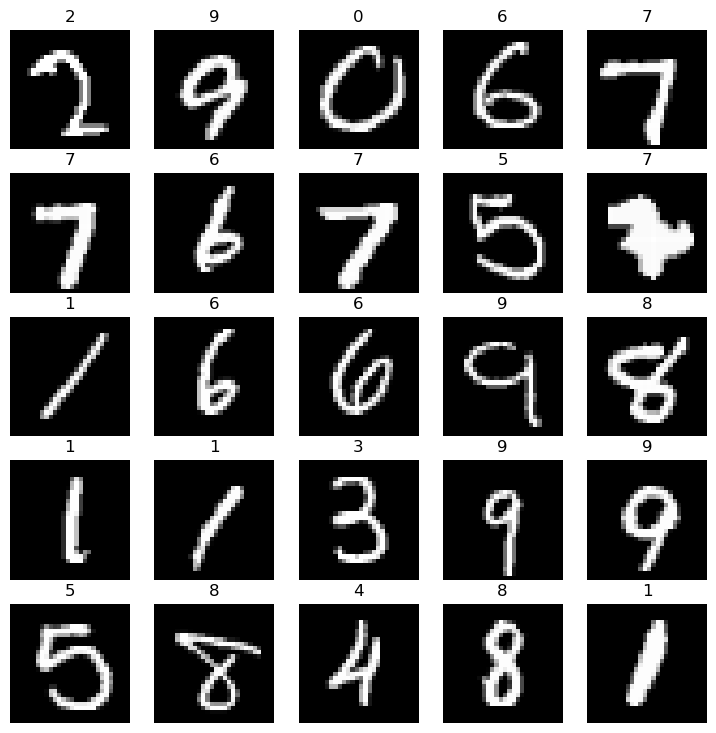

In [55]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9, 9))
rows, cols = 5, 5
for i in range(1, rows*cols +1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    image, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(label)
    plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [56]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [57]:
from math import floor

def out_shape_calc(in_shape: int, kernel_size: int, stride: int = 1, padding: int = 0, dilation: int = 1) -> int:
    return floor((in_shape + 2 * padding - dilation * (kernel_size -1) -1) / stride + 1)

In [58]:
class MNISTModel(nn.Module):
    def __init__(self, in_channels: int, in_height: int, in_width: int, hidden_units: int, out_shape: int):
        super().__init__()
        self.conv_layer_1 = nn.Sequential(
            nn.Conv2d(in_channels=in_channels,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=2,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        h = out_shape_calc(in_shape=in_height, kernel_size=3, stride=1, padding=1)
        h = out_shape_calc(in_shape=h, kernel_size=2, stride=2)
        w = out_shape_calc(in_shape=in_width, kernel_size=3, stride=1, padding=1)
        w = out_shape_calc(in_shape=w, kernel_size=2, stride=2)
        self.conv_layer_2 = nn.Sequential(
                      nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=2,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        h = out_shape_calc(in_shape=h, kernel_size=3, stride=1, padding=1)
        h = out_shape_calc(in_shape=h, kernel_size=2, stride=2)
        w = out_shape_calc(in_shape=w, kernel_size=3, stride=1, padding=1)
        w = out_shape_calc(in_shape=w, kernel_size=2, stride=2)
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*h*w,
                      out_features=out_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.conv_layer_1(x)
        # print(f"Conv layer 1 out shape; {x.shape}")
        x = self.conv_layer_2(x)
        # print(f"Conv layer 2 out shape; {x.shape}")
        x = self.classifier(x)
        # print(f"classifier out shape; {x.shape}")
        return x

In [59]:
height, width, = train_data[0][0].shape[1:]
height, width

(28, 28)

In [60]:
model = MNISTModel(1, height, width, 10, len(classes)).to(device)
model

MNISTModel(
  (conv_layer_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_layer_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [65]:
img = train_data[0][0]
img.unsqueeze(0).shape

torch.Size([1, 1, 28, 28])

In [66]:
model(img.unsqueeze(0).to(device))

tensor([[-0.0788,  0.0288, -0.0205,  0.0295,  0.0573,  0.0122,  0.0362, -0.0041,
          0.0347, -0.0150]], device='cuda:0', grad_fn=<AddmmBackward0>)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [67]:
def train_step(model: nn.Module,
               dataloader: DataLoader,
               loss_fn: nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    """Performs training loop step with model tryin to learn on dataloader"""
    ### Training
    train_loss, train_acc = 0, 0
    model.train()
    # Add a loop through the batches
    for batch, (X, y), in enumerate(dataloader):
        # 0. Send data to device
        X = X.to(device)
        y = y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss and accuracy (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate train loss
        train_acc += accuracy_fn(y_pred=y_pred.argmax(dim=1), y_true=y)


        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Divide total train loss by length of train dataloader
    train_loss /= len(dataloader)
    train_acc /= len(dataloader)
    print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")


def test_step(model: nn.Module,
              dataloader: DataLoader,
              loss_fn: nn.Module,
              accuracy_fn,
              device: torch.device = device):
    """Performs a testing loop step on model going over dataloader"""
    ### Testing
    test_loss, test_acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in dataloader:
            # 0. Send data to device
            X = X.to(device)
            y = y.to(device)
            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy (accumulatively)
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Calculate the test loss average per batch
        test_loss /= len(dataloader)

        # Calculate the test acc average
        test_acc /= len(dataloader)

    # Print out what's happening
    print(f"Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

In [68]:
from timeit import default_timer as timer

def print_train_time(start: float, end: float, device: torch.device = None):
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [69]:
import requests
from pathlib import Path
# Download helper functions from Learn PyTorch repo (if it's not already downloaded)

if (Path("helper_functions.py").is_file()):
    print("helper_functions.py already exists, skipping download")
else:
    print("Download helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")

    with open("helper_functions.py", "wb") as f:
        f.write(request.content)

from helper_functions import accuracy_fn

# Set loss fn and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

helper_functions.py already exists, skipping download


In [70]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_model = timer()

# Set the number of epochs (we'll keep this small for faster training time)

epochs = 5

for epoch in tqdm(range(epochs), "Training model..."):
    train_step(model=model, dataloader=train_dataloader, loss_fn=loss_fn, optimizer=optimizer, accuracy_fn=accuracy_fn)
    test_step(model=model, dataloader=test_dataloader, loss_fn=loss_fn, accuracy_fn=accuracy_fn)

train_time_end_model = timer()
total_train_time_model = print_train_time(train_time_start_model, train_time_end_model, device)

Training model...:   0%|          | 0/5 [00:00<?, ?it/s]

Train loss: 0.37029 | Train acc: 87.32%
Test loss: 0.07698, Test acc: 97.97%

Train loss: 0.07499 | Train acc: 97.70%
Test loss: 0.05049, Test acc: 98.43%

Train loss: 0.06019 | Train acc: 98.11%
Test loss: 0.06839, Test acc: 97.85%

Train loss: 0.05219 | Train acc: 98.33%
Test loss: 0.05114, Test acc: 98.30%

Train loss: 0.04736 | Train acc: 98.47%
Test loss: 0.04353, Test acc: 98.63%

Train time on cuda: 66.087 seconds


## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [71]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
      for sample in data:
        # Prepare the sample
        sample = torch.unsqueeze(sample, dim=0).to(device)

        # Forward pass
        pred_logit = model(sample)

        # Get prediction probability (logit -> prediction probability)
        pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

        # Get prediction label
        pred_label = torch.argmax(pred_prob)

        # Append to list
        pred_probs.append(pred_label.cpu())

    return torch.stack(pred_probs)

In [72]:
import random

test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

In [73]:
preds = make_predictions(model, test_samples, device)
preds

tensor([0, 2, 6, 4, 8, 9, 3, 9, 6])

In [74]:
test_data.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

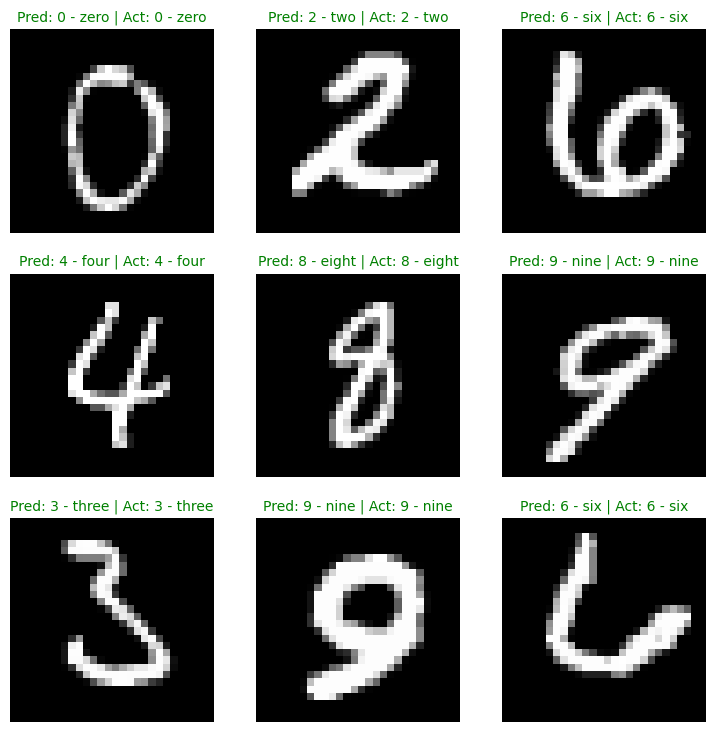

In [75]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
    # Create subplot
    plt.subplot(nrows, ncols, i+1)

    # Plot the target image
    plt.imshow(sample.squeeze(), cmap="gray")

    # Find the prediction label (in text form)
    pred_label = classes[preds[i]]

    # True label
    truth_label = classes[test_labels[i]]

    # Add a title for the plot
    title_text = f"Pred: {pred_label} | Act: {classes[test_labels[i]]}"

    if pred_label == truth_label:
        plt.title(label=title_text, fontsize=10, c="g") # green text if prediction same as truth
    else:
        plt.title(label=title_text, fontsize=10, c="r") # green text if prediction same as truth
    plt.title(label=title_text, fontsize=10)
    plt.axis(False);

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [76]:
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
y_true = []
model.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, "Making predictions..."):
    X, y = X.to(device), y.to(device)
    y_logits = model(X)
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

    y_preds.append(y_pred.cpu())
    y_true.append(y.cpu())

  # Concatenate list of predictions into a tensor
  y_preds = torch.cat(y_preds)
  y_true = torch.cat(y_true)

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

In [77]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend version should be 0.19.0 or higher"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.1


In [78]:
len(y_preds), len(test_data.targets)

(10000, 10000)

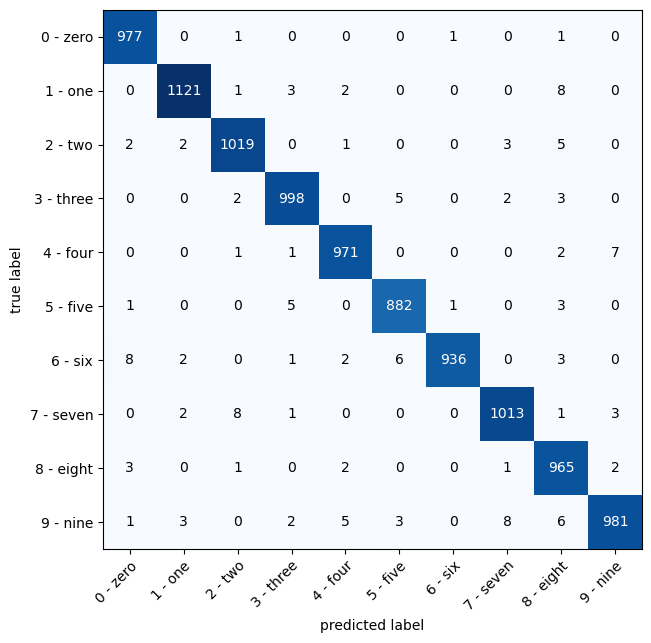

In [79]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(task="multiclass", num_classes=len(classes))
confmat_tensor = confmat(preds=y_preds,
                         target=y_true)

fig, ax =  plot_confusion_matrix(conf_mat=confmat_tensor.numpy(),
                                 class_names=classes,
                                 figsize=(10, 7))

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?